# LEVEL 1 — Sanity Check 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [5]:
df=pd.read_csv("../data/raw/Telco-Customer-Churn.csv")

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Target Identification & Encoding

In [15]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [37]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [38]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [8]:
df['Churn']=df['Churn'].map({'Yes':1,'No':0})
df['Churn'].unique()

array([0, 1], dtype=int64)

### Target Distribution Analysis

In [40]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

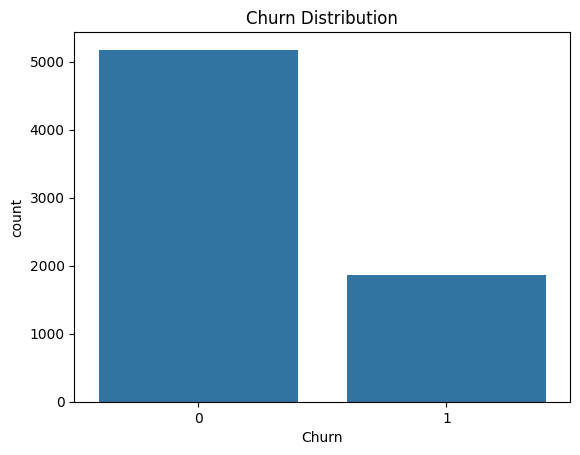

In [43]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

### Check missing values

In [44]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Completed Steps
- ✔ Data loaded
- ✔ Columns inspected
- ✔ Target identified
- ✔ Target encoded (Yes → 1, No → 0)
- ✔ Churn distribution plotted
- ✔ Missing values check

# LEVEL 2 — Understand the Customer Lifecycle 

### SECTION 2.1 — TENURE ANALYSIS

In [55]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [59]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [58]:
df.groupby('Churn')['tenure'].mean()

Churn
0    37.569965
1    17.979133
Name: tenure, dtype: float64

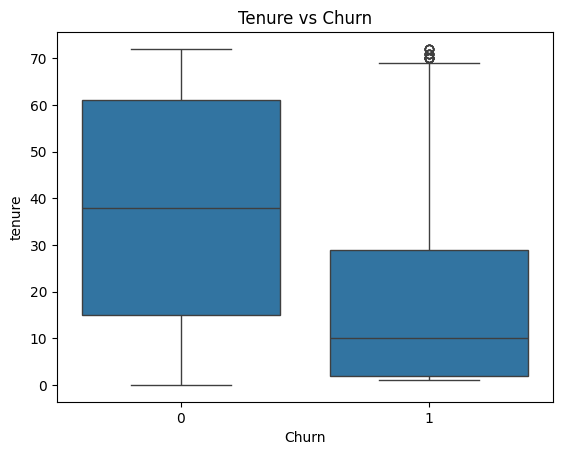

In [62]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()


In [65]:
df['tenure_bucket']=pd.cut(
    df['tenure'],
    bins=[0,6,12,24,48,72],
    labels=['0-6m','6-12m','12-24m','24-48m','48m+']
)

df.groupby('tenure_bucket')['Churn'].mean() * 100


tenure_bucket
0-6m      53.333333
6-12m     35.886525
12-24m    28.710938
24-48m    20.388959
48m+       9.513176
Name: Churn, dtype: float64

### Tenure Analysis — Business Insights


 - Early-stage churn is extremely high.
 - Customers who churn have an average tenure of ~18 months, compared to ~38 months for non-churners.
 - This indicates customers are not finding value early enough.

 - Onboarding is the biggest weakness.
 - The highest churn rate (53%) occurs in the first 0–6 months of customer lifecycle.
- This means most churn happens before long-term loyalty is formed.

 - Churn drops steadily as tenure increases.
 - Churn decreases from 35% (6–12 months) → 29% (12–24 months) → 20% (24–48 months).
 - Engagement improves retention over time.

 - Long-term customers are highly stable.
 - Customers with 48+ months tenure have only ~9.5% churn, indicating strong loyalty once the user crosses the early usage threshold.

 - Business implication:
   Improving first-month experience, onboarding flow, customer education, and support will deliver the highest impact on churn reduction.

### Section 2.2 - Contract Type Analysis

In [67]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_bucket'],
      dtype='object')

In [68]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [71]:
df.groupby('Contract')['Churn'].mean() * 100

Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Churn, dtype: float64

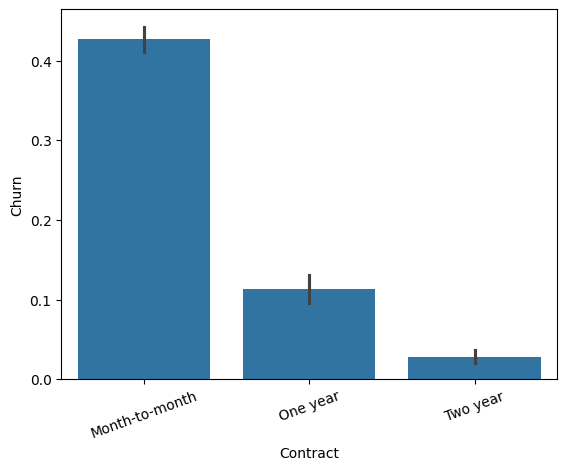

In [79]:
sns.barplot(x='Contract', y='Churn', data=df)
plt.xticks(rotation=20)
plt.show()

### Contract Type – Business Insights

- Customers on **month-to-month contracts** show the highest churn rate.
- This contract type signals **low commitment** and **high switching flexibility**.
- One-year and two-year contracts have **significantly lower churn**, indicating stronger retention.
- Month-to-month users may be more price-sensitive or suffer from onboarding friction.
- Offering incentives, discounts, or loyalty perks for month-to-month customers could reduce churn.


### 2.3 Payment Method Analysis


In [80]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_bucket'],
      dtype='object')

In [83]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [87]:
df.groupby('PaymentMethod')['Churn'].mean()*100

PaymentMethod
Bank transfer (automatic)    16.709845
Credit card (automatic)      15.243101
Electronic check             45.285412
Mailed check                 19.106700
Name: Churn, dtype: float64

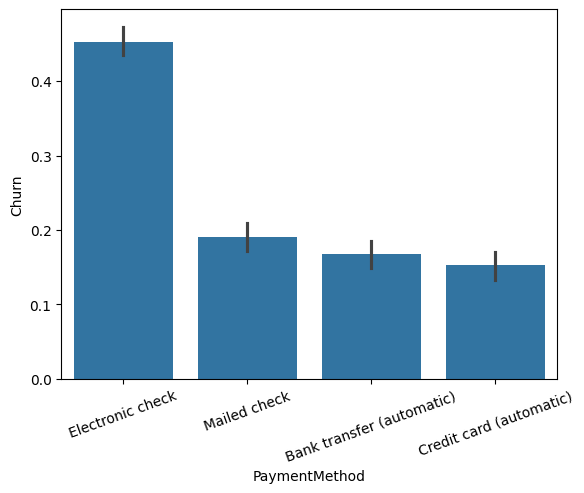

In [89]:
sns.barplot(x='PaymentMethod',y='Churn',data=df)
plt.xticks(rotation=20)
plt.show()

### Insights

- Electronic Check customers show the highest churn rate.
- Automated payment methods (Credit Card / Bank Transfer) show significantly lower churn.
- High churn among manual-payment customers indicates billing friction or dissatisfaction.
- Encouraging users to switch to auto-payment could reduce churn.

### 2.4 — MONTHLY CHARGES ANALYSIS

In [91]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_bucket'],
      dtype='object')

In [93]:
df.groupby('Churn')['MonthlyCharges'].mean()

Churn
0    61.265124
1    74.441332
Name: MonthlyCharges, dtype: float64

In [95]:
df['Monthly-bucket']=pd.cut(
    df['MonthlyCharges'],
    bins=[0,30,60,90,120],
    labels=['0-30', '30-60', '60-90', '90+']
)

df.groupby('Monthly-bucket')['Churn'].mean() * 100

Monthly-bucket
0-30      9.800363
30-60    25.928854
60-90    33.906119
90+      32.777458
Name: Churn, dtype: float64

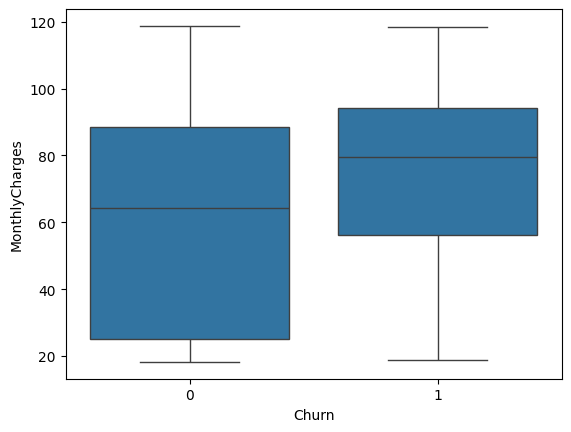

In [96]:
sns.boxplot(x='Churn',y='MonthlyCharges',data=df)
plt.show()

### Business Insights — Monthly Charges

- Customers with higher monthly charges churn more, showing clear price sensitivity.
- The ₹60–₹90 range has the highest churn (~34%), indicating weak value perception in mid-tier plans.
- Low-charge customers (<₹30) rarely churn (~10%), making them a stable and low-risk segment.
- High-charge customers (₹90+) also churn (~33%), suggesting dissatisfaction with premium pricing or alternatives.
- Pricing strategy and plan restructuring are key levers to reduce churn in mid- and high-tier segments.

### Section 2.5 — TOTAL CHARGES ANALYSIS

In [100]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_bucket', 'Monthly-bucket'],
      dtype='object')

In [38]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [103]:
df.groupby('Churn')['TotalCharges'].mean()

Churn
0    2555.344141
1    1531.796094
Name: TotalCharges, dtype: float64

In [107]:
df['TotalCharges_bucket']=pd.cut(
    df['TotalCharges'],
    bins=[0,500,2000,5000,10000],
    labels=['0-500','500-2000','2000-5000', '5000+']
)

df.groupby('TotalCharges_bucket')['Churn'].mean() * 100

TotalCharges_bucket
0-500        41.450000
500-2000     23.437500
2000-5000    21.673446
5000+        13.832599
Name: Churn, dtype: float64

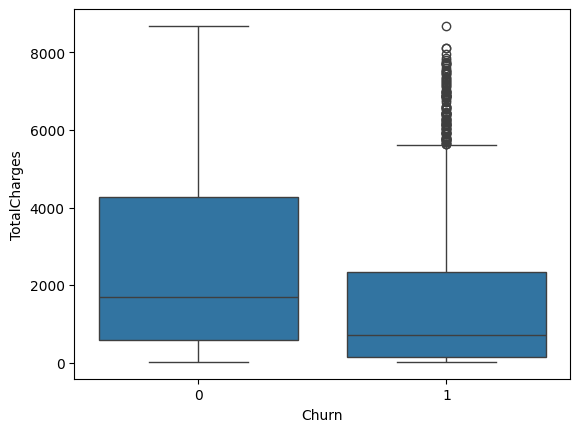

In [108]:
sns.boxplot(x='Churn',y='TotalCharges',data=df)
plt.show()

### Insights

• Churners have significantly lower total charges, indicating that they leave early in their lifecycle and generate lower lifetime value.

• Higher-spending customers (long-term users) show much lower churn rates, indicating strong retention once customers cross the early usage phase.

• Price is not the primary driver for long-term churners; early-stage dissatisfaction is more critical.

• Reducing friction in onboarding and early months will have the largest impact on total churn reduction.


### Customer Churn — Key EDA Insights (Business-Focused)

### 1. Tenure Insights
- Customers who churn have **significantly lower tenure** (~18 months) vs non-churners (~38 months).
- **Early-stage churn is high** — customers in their first 6 months show a **53% churn rate**.
- Churn drops sharply as tenure increases, reaching **~9% for long-term customers** (48+ months).
- 👉 *Business implication:* Improve onboarding, first-month experience, and early-value delivery.

---

### 2. Contract Type Insights
- **Month-to-month customers churn the most** — highest churn percentage among all contract categories.
- **One-year and two-year contracts** show much lower churn due to commitment.
- 👉 *Business implication:* Incentivize customers to move from monthly to longer-term contracts.

---

### 3. Payment Method Insights
- Certain payment methods (e.g., **Electronic Check**) show **significantly higher churn**.
- Auto-pay or bank transfer customers churn noticeably less, indicating friction in manual billing.
- 👉 *Business implication:* Promote automatic payments and reduce payment friction to lower churn.

---

### 4. Monthly Charges Insights
- Churners pay **higher monthly charges on average** (~74) than non-churners (~61).
- Customers in the **60–90 range show peak churn** (~34%).
- Very low-bill customers (<30) churn the least.
- 👉 *Business implication:* High-price customers are more sensitive — optimize pricing tiers or offer retention discounts.

---

### 5. Total Charges Insights
- Customers who have spent less overall are typically newer → these people churn the most.
- Customers who have spent a lot over time have been around longer → they almost never churn.
- TotalCharges is basically a measure of lifetime value.
- 👉 *Business implication:* should focus retention strategies on new customers first, because old customers rarely leave.

---

### Overall EDA Conclusion
- Churn is primarily driven by **early-stage customers**, **month-to-month contracts**, **high monthly charges**, and **payment friction**.
- Strong signals point to:
  - onboarding weaknesses,
  - pricing sensitivity,
  - commitment issues,
  - payment method issues.


### Completed

- Feature-wise churn rate comparison ✔ 
- Numerical vs churn insights ✔ 
- Categorical vs churn insights ✔
- Bar plots and comparisons ✔
- Boxplots & distributions ✔ 
- Bucketing for lifecycle patterns ✔ 
- Business interpretation ✔ 


## Level 3 : Feauture Exploration

### Section 3.1 : Numerical Feauture Exploration

In [40]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [41]:
num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges','TotalCharges']
num_cols


['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

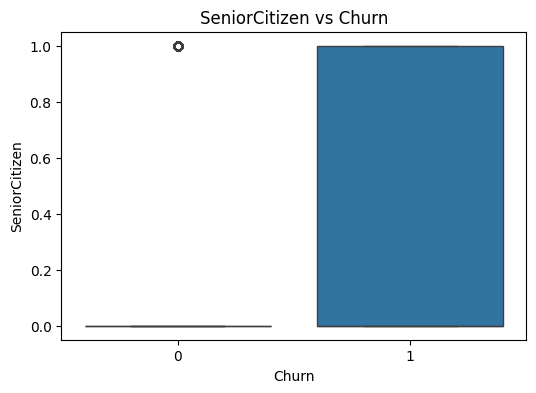

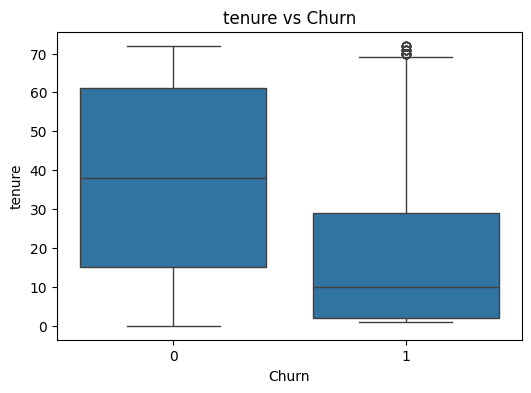

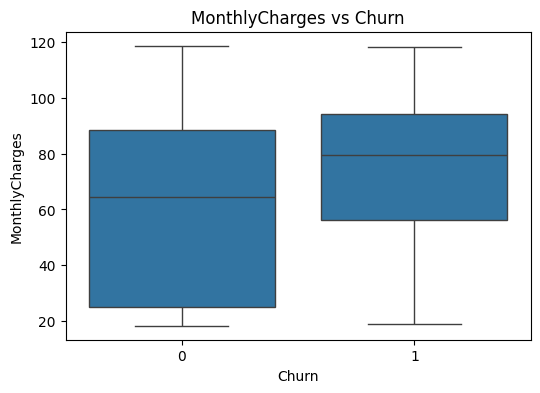

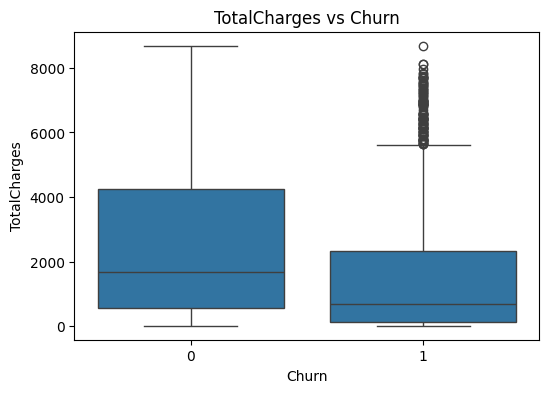

In [42]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()


In [43]:
df[num_cols + ['Churn']].corr()['Churn'].sort_values(ascending=False)

Churn             1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
TotalCharges     -0.199484
tenure           -0.352229
Name: Churn, dtype: float64

In [39]:
df[['tenure','TotalCharges']].corr()

,tenure,TotalCharges
tenure,1.00000,0.82588
TotalCharges,0.82588,1.00000


In [25]:
df.groupby('Churn')[num_cols].mean()

,SeniorCitizen,tenure,MonthlyCharges
Churn,,,
0,0.128721,37.569965,61.265124
1,0.254682,17.979133,74.441332


### Feature Insights

- **MonthlyCharges** shows a positive correlation with churn (higher bills → higher churn).
- **SeniorCitizen** has a mild positive correlation (seniors churn more).
- **Tenure** has a strong negative correlation (new customers churn more).
- Tenure and TotalCharges show high correlation (≈0.83), since TotalCharges depends on tenure.



### Section 3.1 : Categorical Feauture Exploration

In [28]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols


['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges']

In [29]:
cat_cols += ['SeniorCitizen']


In [31]:
for col in cat_cols:
    print(f"--- {col} ---")
    print(df.groupby(col)['Churn'].mean() * 100)
    print("\n")


--- customerID ---
customerID
0002-ORFBO      0.0
0003-MKNFE      0.0
0004-TLHLJ    100.0
0011-IGKFF    100.0
0013-EXCHZ    100.0
              ...  
9987-LUTYD      0.0
9992-RRAMN    100.0
9992-UJOEL      0.0
9993-LHIEB      0.0
9995-HOTOH      0.0
Name: Churn, Length: 7043, dtype: float64


--- gender ---
gender
Female    26.920872
Male      26.160338
Name: Churn, dtype: float64


--- Partner ---
Partner
No     32.957979
Yes    19.664903
Name: Churn, dtype: float64


--- Dependents ---
Dependents
No     31.279140
Yes    15.450237
Name: Churn, dtype: float64


--- PhoneService ---
PhoneService
No     24.926686
Yes    26.709637
Name: Churn, dtype: float64


--- MultipleLines ---
MultipleLines
No                  25.044248
No phone service    24.926686
Yes                 28.609896
Name: Churn, dtype: float64


--- InternetService ---
InternetService
DSL            18.959108
Fiber optic    41.892765
No              7.404980
Name: Churn, dtype: float64


--- OnlineSecurity ---
OnlineSecu

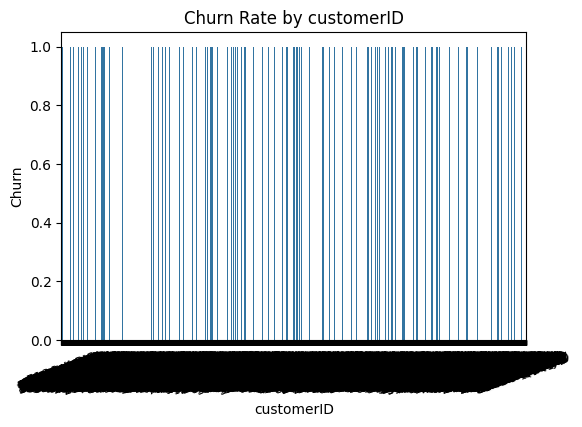

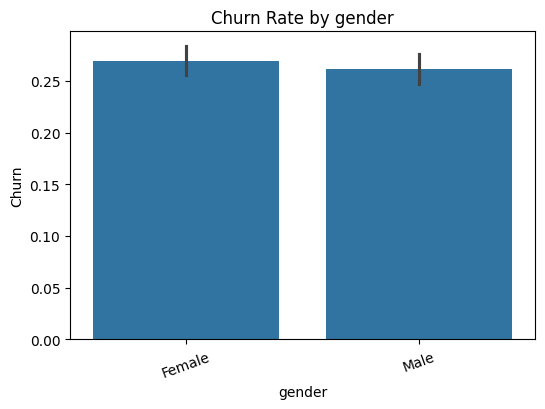

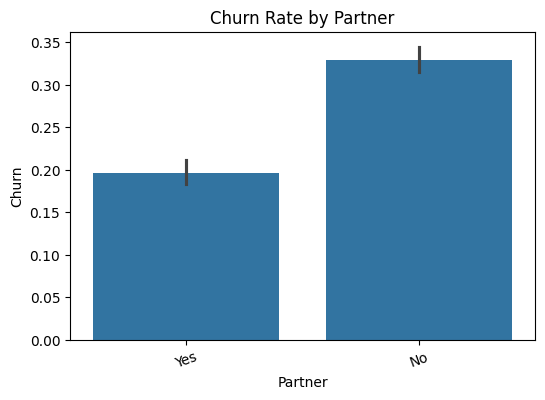

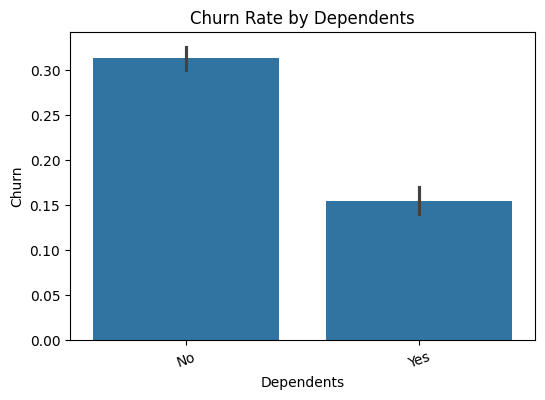

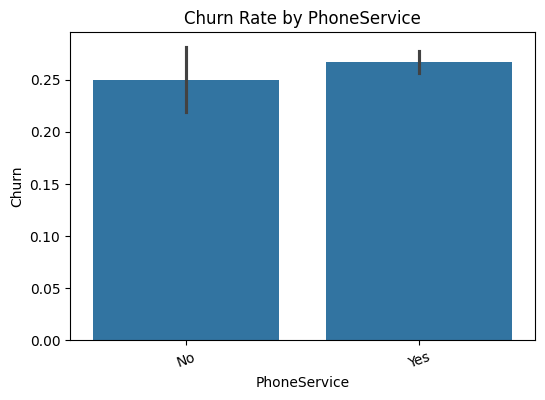

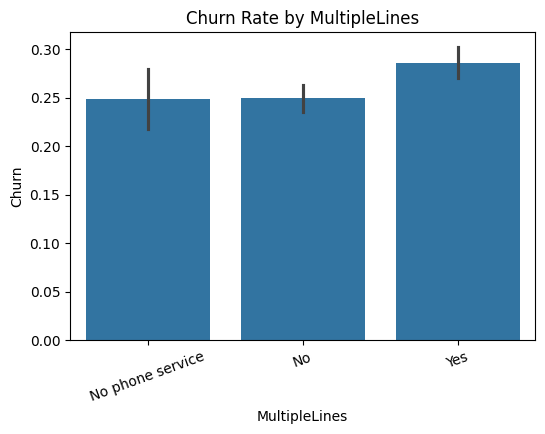

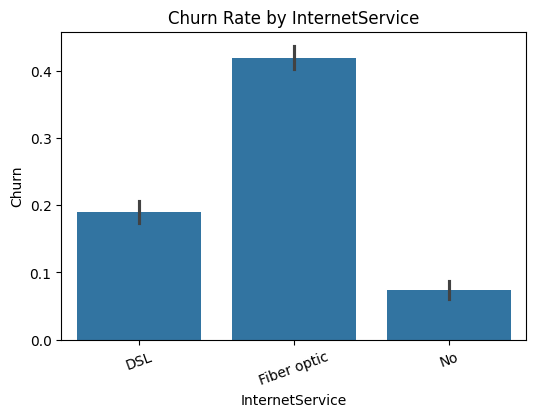

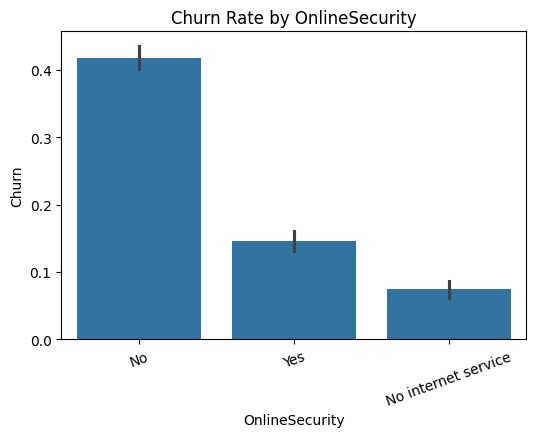

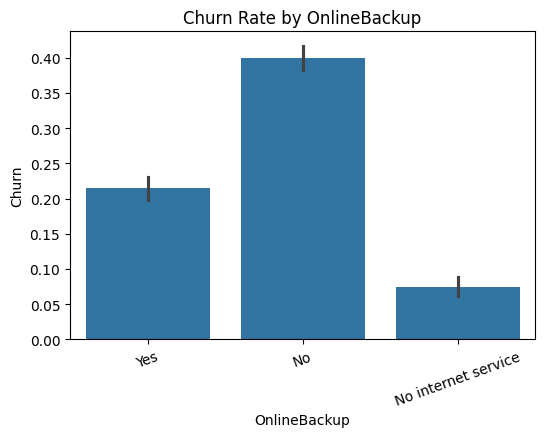

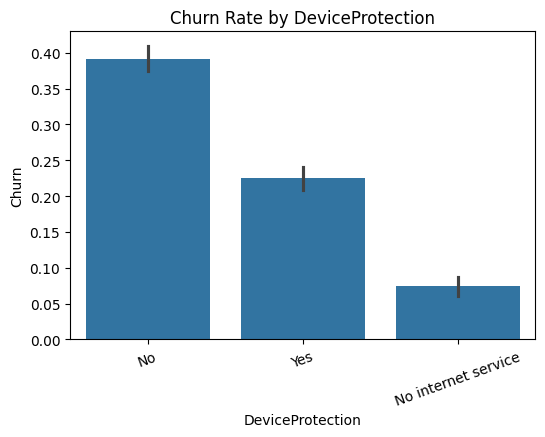

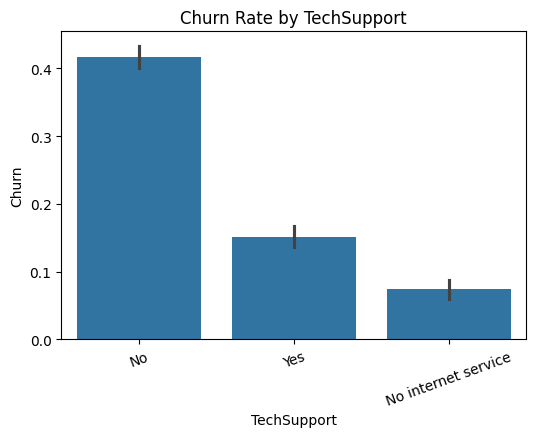

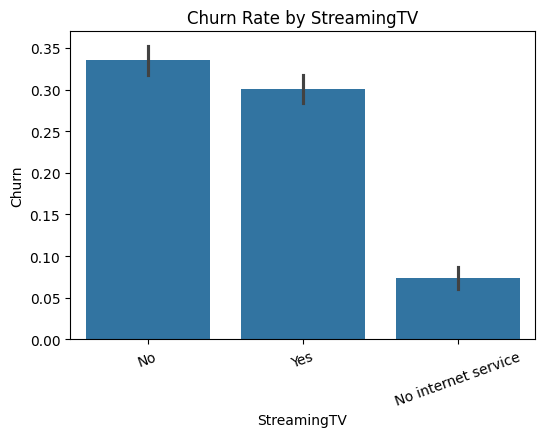

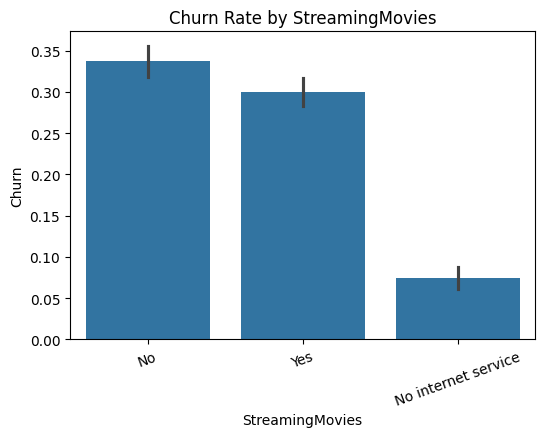

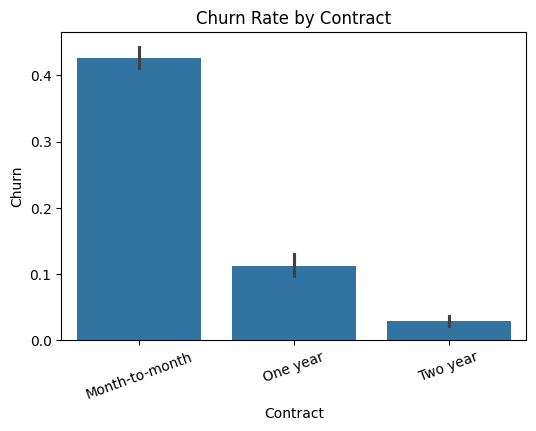

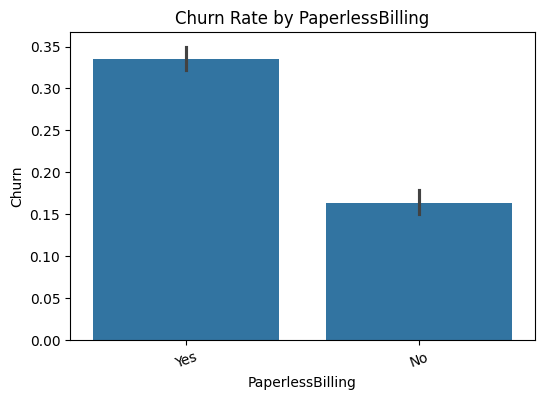

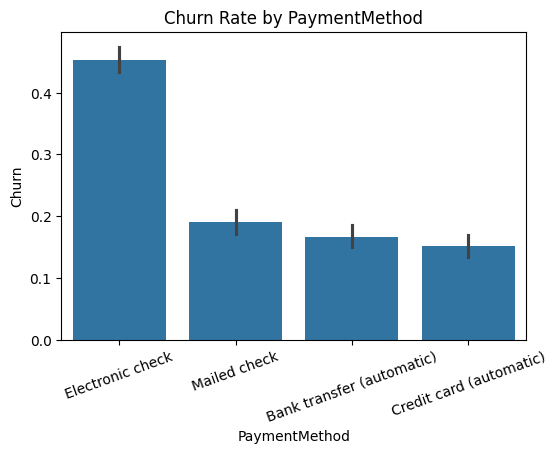

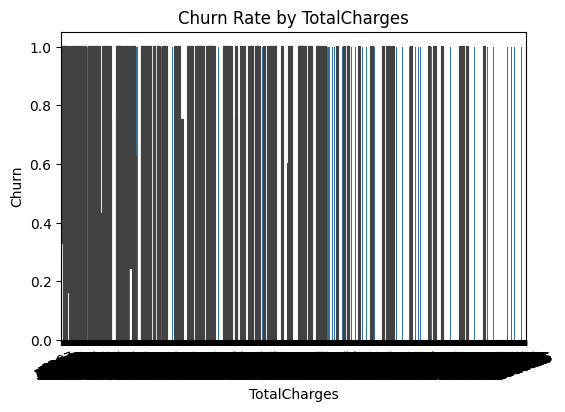

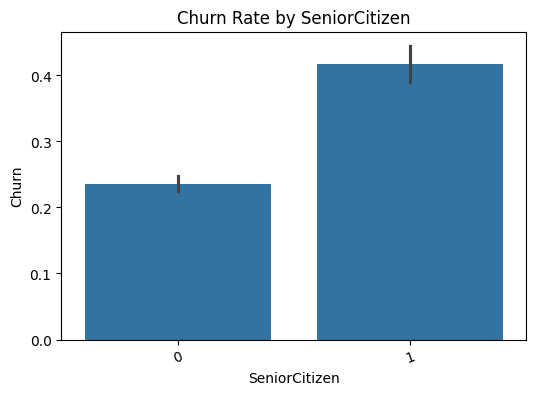

In [34]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y='Churn', data=df)
    plt.xticks(rotation=20)
    plt.title(f"Churn Rate by {col}")
    plt.show()


### Categorical Feature Insights
- Senior citizens show higher churn risk.
- Month-to-month contracts churn far more than long-term contracts.
- Electronic check users churn the most due to payment friction.
- Fiber-optic users have higher churn, indicating service dissatisfaction.
- Lack of tech support strongly correlates with churn.
- No device protection increases churn risk.
- No online backup also shows elevated churn.

## Section 3.3 :Multicollinearity & Redundancy Check
### multicollinearity → two features carry the SAME information.

- Two features telling the same story makes the model:

 - memorize patterns

- reduce generalization

- inflate variance

### Multicollinearity Summary
- Tenure and TotalCharges show high correlation (≈0.83), since TotalCharges depends on tenure.
- No harmful multicollinearity affecting model stability.
- For linear models, consider dropping TotalCharges to reduce redundancy.
- No target leakage detected — all features occur before churn happens.


### Strongest Predictor Candidates
- **Tenure** — strongest inverse predictor (low tenure → high churn).
- **Contract type** — month-to-month contracts show the highest churn.
- **Payment method** — electronic check customers churn the most.
- **Tech support / online backup / device protection** — lack of services increases churn.
- **Monthly charges** — higher bills moderately increase churn.
- **Senior citizen** — higher churn tendency.
- **Total charges** — lower lifetime value correlates with churn.

###  Final EDA Summary

- ✔ Churners have significantly lower tenure → strong early-stage churn.
- ✔ Month-to-month contracts show the highest churn → low commitment risk.
- ✔ Electronic check users churn the most → payment friction issue.
- ✔ Senior citizens show higher churn → support/onboarding gap.
- ✔ High monthly charges correlate with higher churn → price sensitivity.
- ✔ TotalCharges strongly linked with tenure → long-term customers are stable.
- ✔ No major multicollinearity detected → numerical features safe to use.
- ✔ No target leakage found → dataset is clean and modeling can proceed.

**Strongest predictors identified:**
- Tenure  
- Contract type  
- Payment method  
- MonthlyCharges  
